In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [2]:
# Remove pandas duplication of the first column within the file
df = pd.read_csv('./churn_clean.csv', index_col=0)

In [3]:
# View data types and column information, dataframe as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
# View data counts to ensure appropriate values for Income
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [5]:
# View data counts to ensure appropriate values for Churn
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [6]:
# View data counts to ensure appropriate values for Outages
df.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [7]:
# View values for Yearly equipment failure
df.Yearly_equip_failure.describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [8]:
# View data counts to ensure appropriate values for Contract
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [9]:
# View data counts to ensure appropriate values for Internet Service
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [10]:
# View data counts to ensure appropriate values for Multiple
df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [11]:
# View data counts to ensure appropriate values for OnlineSecurity    
df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [12]:
# View data counts to ensure appropriate values for OnlineBackup 
df.OnlineBackup.value_counts()  

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [13]:
# View data counts to ensure appropriate values for Tenure
df.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [14]:
# View data counts to ensure appropriate values for Monthly Charge
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [15]:
# View data counts to ensure appropriate values for Bandwidth
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [16]:
# View data counts to ensure appropriate values for Item1
df.Item1.value_counts()  

3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: Item1, dtype: int64

In [17]:
# View data counts to ensure appropriate values for Item2
df.Item2.value_counts()

3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: Item2, dtype: int64

In [18]:
# View data counts to ensure appropriate values for Item3
df.Item3.value_counts()

3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: Item3, dtype: int64

In [19]:
# View data counts to ensure appropriate values for Item4
df.Item4.value_counts()

4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: Item4, dtype: int64

In [20]:
# View data counts to ensure appropriate values for Item5
df.Item5.value_counts()

3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: Item5, dtype: int64

In [21]:
# View data counts to ensure appropriate values for Item6
df.Item6.value_counts()

3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: Item6, dtype: int64

In [22]:
# View data counts to ensure appropriate values for Item7
df.Item7.value_counts()

4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: Item7, dtype: int64

In [23]:
# View data counts to ensure appropriate values for Item8
df.Item8.value_counts()

3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: Item8, dtype: int64

In [24]:
# Check for missing values
print(df.isnull().sum())

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [25]:
# Check for duplicates
duplicates = df.duplicated(keep=False)
duplicate_rows = df[duplicates]
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [26]:
# Clean up and prepare the data
# Rename the Monthlycharge column for proper spacing
df = df.rename(columns={'MonthlyCharge': 'Monthly_Charge'});

# Rename the Bandwidth_GB_Year column for added clarification
df = df.rename(columns={'Bandwidth_GB_Year': 'Bandwidth_Usage'});

# Rename the Yearly_equip_failure column for proper spacing
df = df.rename(columns={'Yearly_equip_failure': 'Equipment_failure'})

# Rename the Outage_sec_perweek column for proper spacing
df = df.rename(columns={'Outage_sec_perweek': 'Outages'})

# Rename the Onlinesecurity column for proper spacing
df = df.rename(columns={'OnlineSecurity': 'Online_Security'});

# Rename the Onlinebackup column for proper spacing
df = df.rename(columns={'OnlineBackup': 'Online_Backup'});

# Rename the Internetservice column for proper spacing
df = df.rename(columns={'InternetService': 'Internet_Service'});

# Rename the Item1 column for added clarification
df = df.rename(columns={'Item1': 'Timely_Response'});

# Rename the Item2 column for added clarification
df = df.rename(columns={'Item2': 'Timely_Fixes'});

# Rename the Item3 column for added clarification
df = df.rename(columns={'Item3': 'Timely_Replacements'});

# Rename the Item4 column for added clarification
df = df.rename(columns={'Item4': 'Reliability'});

# Rename the Item5 column for added clarification
df = df.rename(columns={'Item5': 'Options'});

# Rename the Item6 column for added clarification
df = df.rename(columns={'Item6': 'Respectful_Response'});

# Rename the Item7 column for added clarification
df = df.rename(columns={'Item7': 'Courteous_Exchange'});

# Rename the Item8 column for added clarification
df = df.rename(columns={'Item8': 'Active_Listening'});

# Convert numeric values to int
df["Income"] = df["Income"].astype(int);
df["Monthly_Charge"] = df["Monthly_Charge"].astype(int);
df["Equipment_failure"] = df["Equipment_failure"].astype(int);
df["Outages"] = df["Outages"].astype(int);
df["Bandwidth_Usage"] = df["Bandwidth_Usage"].astype(int);

# Convert Contract column 
df["Contract"] = df["Contract"].astype("category");

# Convert Internet_Service column
df["Internet_Service"] = df["Internet_Service"].astype("category");

# Change all yes/no values to 1 or 0 by mapping
Cat_map = {'Yes': 1, 'No': 0};

# Apply the mapping to applicable columns
convert = ["Multiple" , "Online_Security" , "Online_Backup", "Churn"]
df[convert] = df[convert].replace(Cat_map);


# Create a mapping of survey scores to their ordinal values
Survey_mapping = {
    1: '1',
    2: '1',
    3: '1',
    4: '1',
    5: '0',
    6: '0',
    7: '0',
    8: '0'
}

# Apply the mapping to create new binary columns for each survey score
survey_columns = ["Timely_Response", "Timely_Fixes", "Timely_Replacements", 
                  "Reliability", "Options", "Respectful_Response", 
                  "Courteous_Exchange", "Active_Listening"]

for column in survey_columns:
    df[column] = df[column].map(Survey_mapping).astype(int)

# Create dummy variables for applicable columns and new dataframe
Dummy_Variables = ["Internet_Service", "Contract"]
dummy_dfs = []

for column in Dummy_Variables:
    dummy_df = pd.get_dummies(data=df[column], prefix=column, drop_first=True)
    dummy_dfs.append(dummy_df)

# Create new dataframe with variables used in analysis
model_df = df[[ "Bandwidth_Usage" , "Outages" , "Equipment_failure" , "Monthly_Charge" , "Income" , 
      "Multiple", "Online_Security", "Online_Backup", "Churn" , "Timely_Response", "Timely_Fixes", "Timely_Replacements", 
               "Reliability", "Options", "Respectful_Response", 
           "Courteous_Exchange", "Active_Listening"]]

# Concatenate the dummy variables/df with the original df
model_df = pd.concat([model_df] + dummy_dfs, axis=1)

# Visually inspect the new dataframe
pd.set_option("display.max_columns", None)
print(model_df.head(5))

           Bandwidth_Usage  Outages  Equipment_failure  Monthly_Charge  \
CaseOrder                                                                
1                      904        7                  1             172   
2                      800       11                  1             242   
3                     2054       10                  1             159   
4                     2164       14                  0             119   
5                      271        8                  1             149   

           Income  Multiple  Online_Security  Online_Backup  Churn  \
CaseOrder                                                            
1           28561         0                1              1      0   
2           21704         1                1              0      1   
3            9609         1                0              0      0   
4           18925         0                1              0      0   
5           40074         0                0              0  

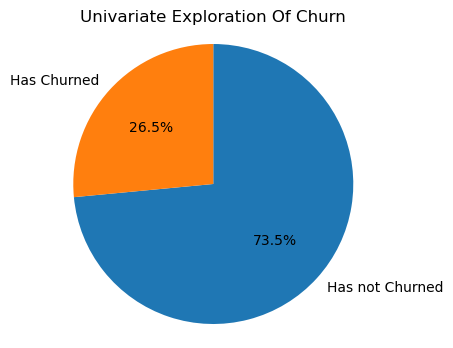

In [27]:
# First plot: Univariate exploration of Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Churn")
Churn_counts = model_df["Churn"].value_counts().sort_index()
plt.pie(Churn_counts, labels=["Has not Churned", "Has Churned"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

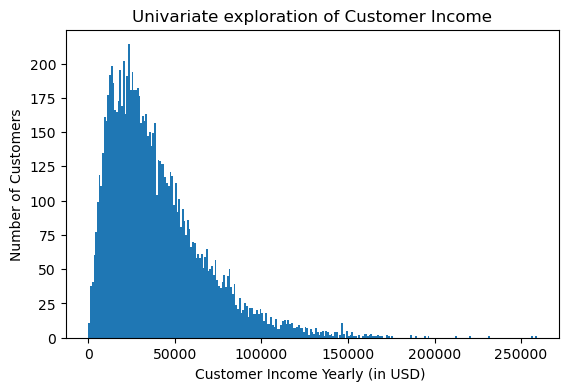

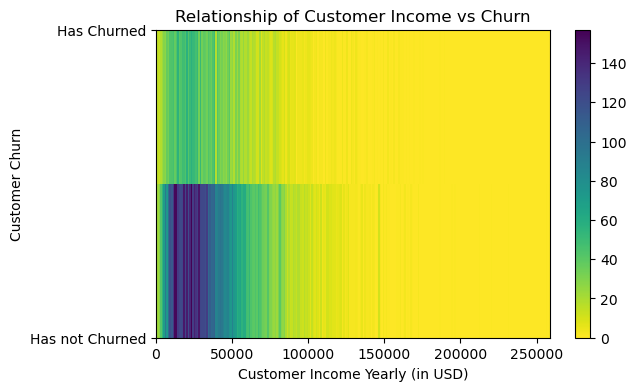

In [28]:
# First plot: Univariate exploration of Income
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of Customer Income')
bins = np.arange(0, df.Income.max() + 500, 1000)
plt.hist(data=model_df, x="Income", bins=bins)
plt.xlabel('Customer Income Yearly (in USD) ')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Income vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Income vs Churn")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= model_df, x="Income", y="Churn", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Customer Income Yearly (in USD)")
plt.ylabel("Customer Churn")
plt.yticks([0,1], ["Has not Churned", "Has Churned"]);

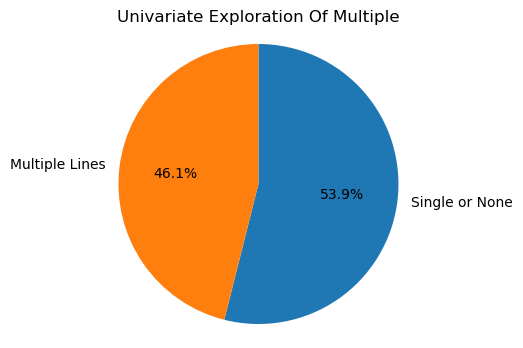

In [29]:
# First plot: Univariate exploration of Multiple variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Multiple")
Multiple_counts = model_df["Multiple"].value_counts().sort_index()
plt.pie(Multiple_counts, labels=["Single or None", "Multiple Lines"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

<Figure size 1400x400 with 0 Axes>

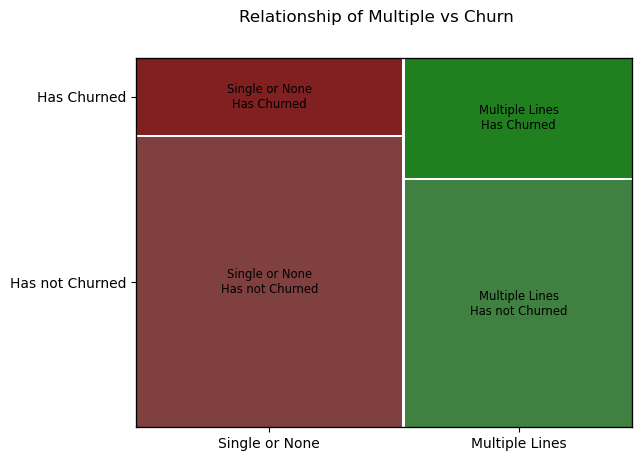

In [30]:
# Second plot: Bivariate exploration of Multiple vs Churn
plt.figure(figsize = [14,4])
MC_df = df[["Multiple", "Churn"]].copy()
Multiple_map = {1 : "Multiple Lines", 0: "Single or None"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
MC_df["Multiple"] = MC_df["Multiple"].map(Multiple_map)
MC_df["Churn"] = MC_df["Churn"].map(Churn_map)
mosaic(MC_df, ["Multiple", "Churn"])
plt.suptitle("Relationship of Multiple vs Churn");

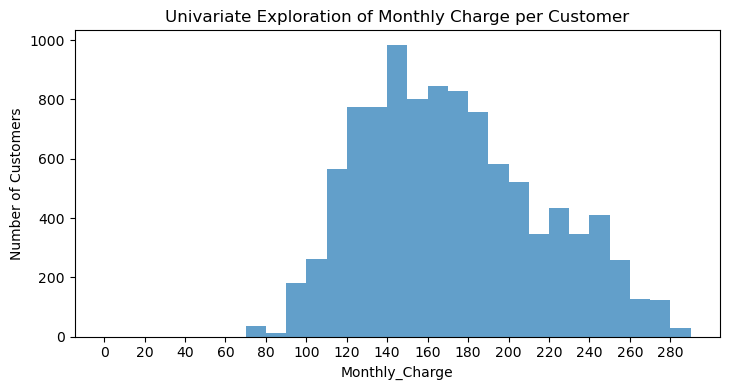

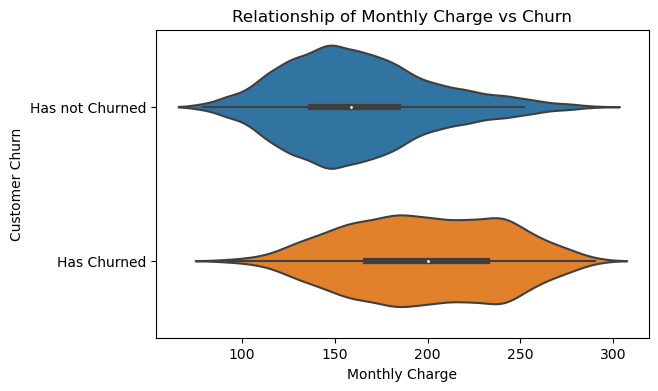

In [31]:
# First plot: Univariate exploration of Monthly Charge variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title('Univariate Exploration of Monthly Charge per Customer')
bins = np.arange(0, df.Monthly_Charge.max() + 10, 10)
plt.hist(data=model_df, x="Monthly_Charge", bins=bins, alpha=0.7)
plt.xlabel('Monthly_Charge')
plt.ylabel("Number of Customers")
plt.xticks(np.arange(0, df['Monthly_Charge'].max() + 10, 20))
plt.tight_layout()

# Second plot: Univariate exploration of Monthly Charge vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Monthly Charge vs Churn")
sns.violinplot(data = model_df, x="Monthly_Charge", y="Churn", orient='h')
plt.xlabel("Monthly Charge")
plt.ylabel("Customer Churn")
plt.yticks([0,1], ["Has not Churned", "Has Churned"]);

Text(0, 0.5, 'Number of Customers')

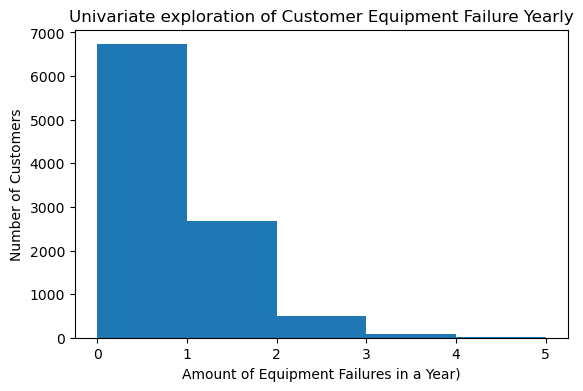

In [32]:
# First plot: Univariate exploration of Customer Equipment Failure
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate exploration of Customer Equipment Failure Yearly")
bins = np.arange(0, model_df.Equipment_failure.max())
plt.hist(data=model_df, x="Equipment_failure", bins=bins)
plt.xlabel('Amount of Equipment Failures in a Year)')
plt.ylabel("Number of Customers")

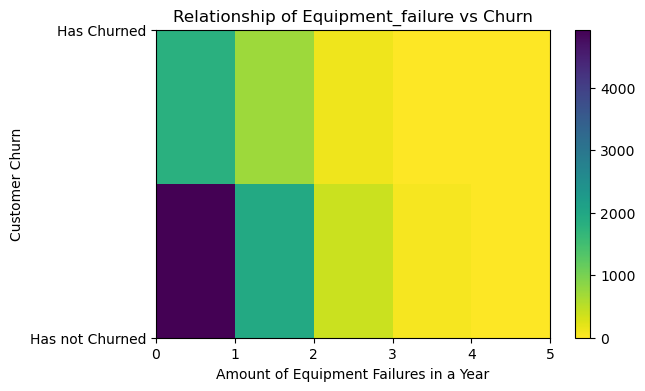

In [33]:
# Second plot: Bivariate exploration of Equipment_failure vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Equipment_failure vs Churn")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= model_df, x="Equipment_failure", y="Churn", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Amount of Equipment Failures in a Year")
plt.ylabel("Customer Churn")
plt.yticks([0,1], ["Has not Churned", "Has Churned"]);

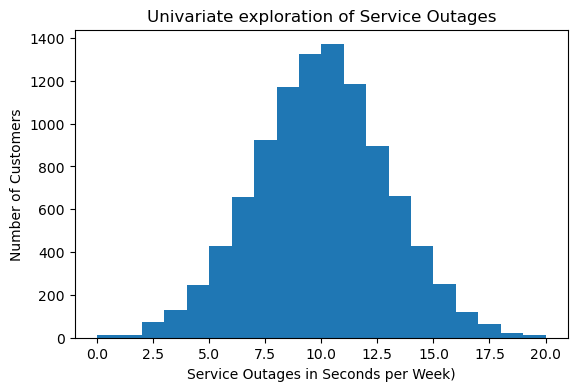

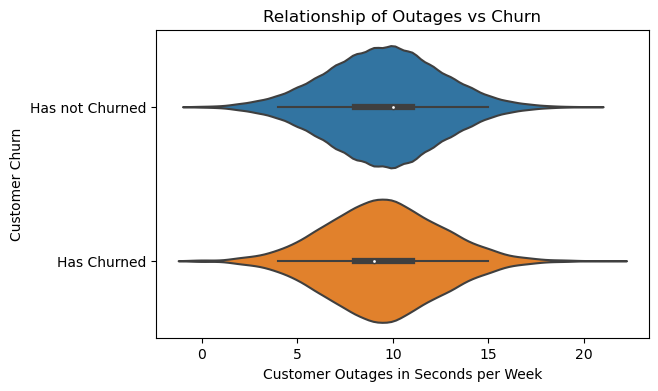

In [34]:
# First plot: Univariate exploration of Outage Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of Service Outages')
bins = np.arange(0, df.Outages.max())
plt.hist(data=model_df, x="Outages", bins=bins)
plt.xlabel('Service Outages in Seconds per Week)')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Outages vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Outages vs Churn")
sns.violinplot(data = model_df, x="Outages", y="Churn", orient='h')
plt.xlabel("Customer Outages in Seconds per Week")
plt.ylabel("Customer Churn")
plt.yticks([0,1], ["Has not Churned", "Has Churned"]);

<Figure size 1400x400 with 0 Axes>

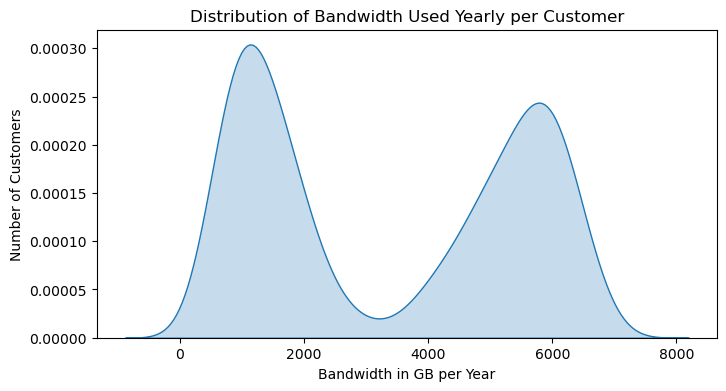

Text(0, 0.5, 'Customer Churn')

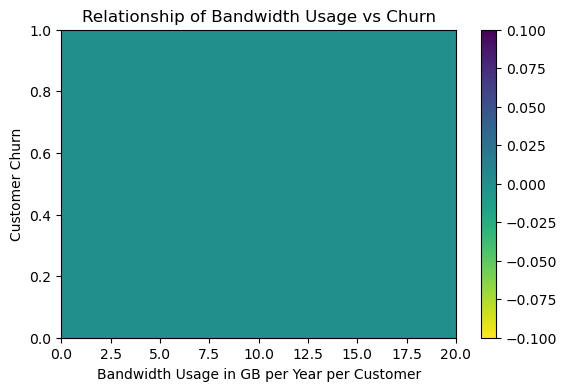

In [35]:
# First plot: Univariate exploration of Bandwidth Variable
plt.figure(figsize = [14,4])
plt.figure(figsize=(8, 4))
sns.kdeplot(model_df['Bandwidth_Usage'], fill=True)
plt.title("Distribution of Bandwidth Used Yearly per Customer")
plt.xlabel("Bandwidth in GB per Year")
plt.ylabel("Number of Customers")
plt.show()

# Second plot: Bivariate exploration of Bandwidth vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Bandwidth Usage vs Churn")
bins_y = np.arange(0, 1.25, 0.5)
plt.hist2d(data= model_df, x="Bandwidth_Usage", y="Churn", bins=[bins, bins_y], cmap= "viridis_r")
plt.colorbar()
plt.xlabel("Bandwidth Usage in GB per Year per Customer")
plt.ylabel("Customer Churn")

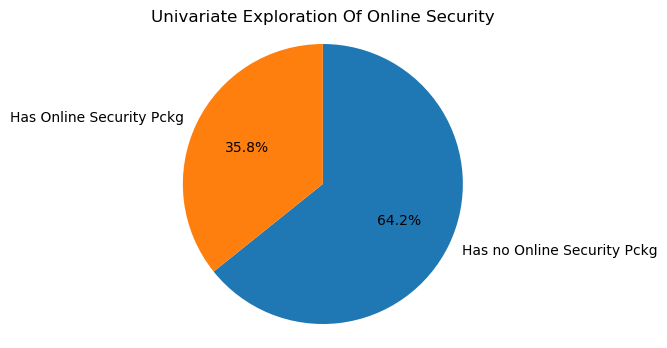

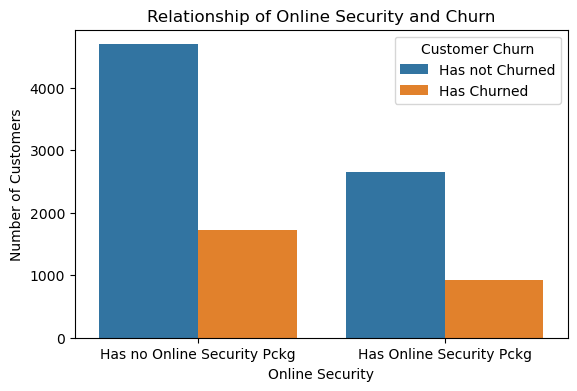

In [36]:
# First plot: Univariate exploration of Online_Security Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Online Security")
Online_Security_counts = model_df["Online_Security"].value_counts().sort_index()
plt.pie(Online_Security_counts, labels=["Has no Online Security Pckg", "Has Online Security Pckg"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# First plot: Bivariate exploration of Online_Security Vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Online Security and Churn")
sns.countplot(data = model_df, x="Online_Security", hue="Churn")
plt.legend(title="Customer Churn", labels=["Has not Churned", "Has Churned"])
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")
plt.xticks([0,1,], ["Has no Online Security Pckg", "Has Online Security Pckg"]);

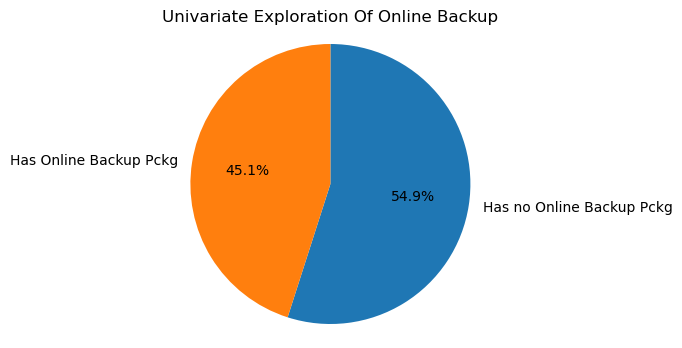

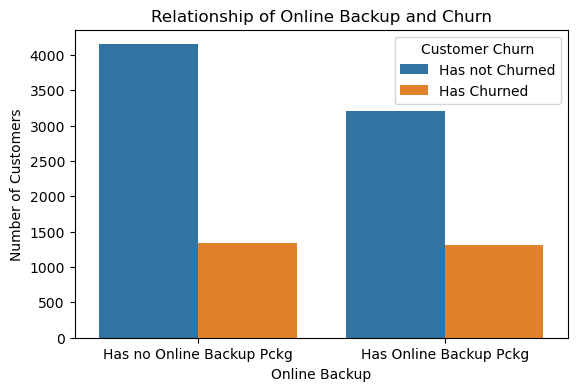

In [37]:
# First plot: Univariate exploration of Online_Backup Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Online Backup")
Online_Backup_counts = model_df["Online_Backup"].value_counts().sort_index()
plt.pie(Online_Backup_counts, labels=["Has no Online Backup Pckg", "Has Online Backup Pckg"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Online_Backup Vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Online Backup and Churn")
sns.countplot(data = model_df, x="Online_Backup", hue="Churn")
plt.legend(title="Customer Churn", labels=["Has not Churned", "Has Churned"])
plt.xlabel("Online Backup")
plt.ylabel("Number of Customers")
plt.xticks([0,1,], ["Has no Online Backup Pckg", "Has Online Backup Pckg"]);

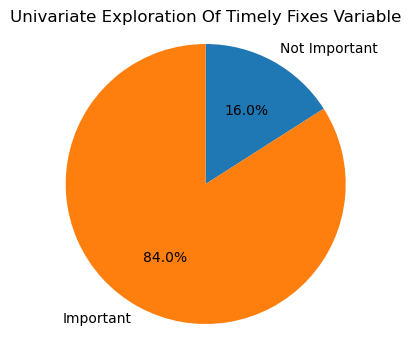

<Figure size 1400x400 with 0 Axes>

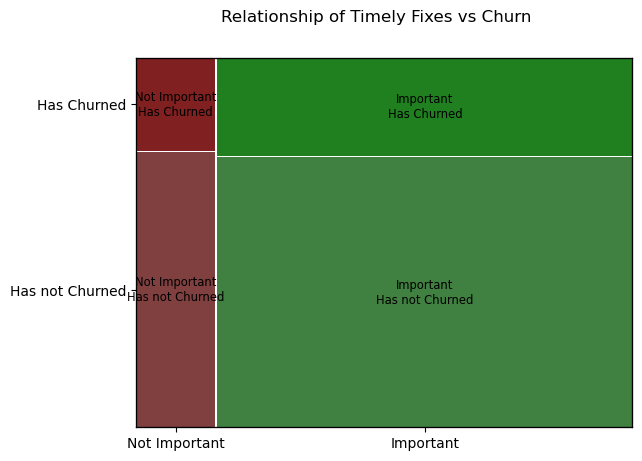

In [38]:
# First plot: Univariate exploration of Timely Fixes Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Timely Fixes Variable")
Timely_Fixes_counts = model_df["Timely_Fixes"].value_counts().sort_index()
plt.pie(Timely_Fixes_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Timely Fixes Vs Churn
plt.figure(figsize = [14,4])
TFC_df = df[["Timely_Fixes", "Churn"]].copy()
Timely_Fixes_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
TFC_df["Timely_Fixes"] = TFC_df["Timely_Fixes"].map(Timely_Fixes_map)
TFC_df["Churn"] = TFC_df["Churn"].map(Churn_map)
mosaic(TFC_df, ["Timely_Fixes", "Churn"])
plt.suptitle("Relationship of Timely Fixes vs Churn");

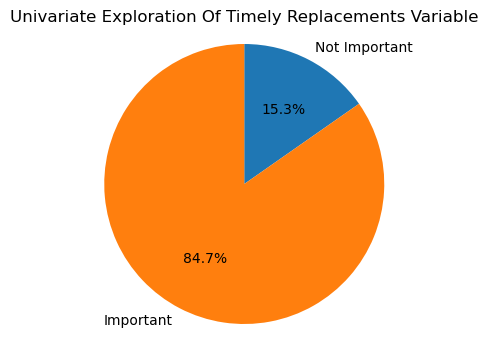

<Figure size 1400x400 with 0 Axes>

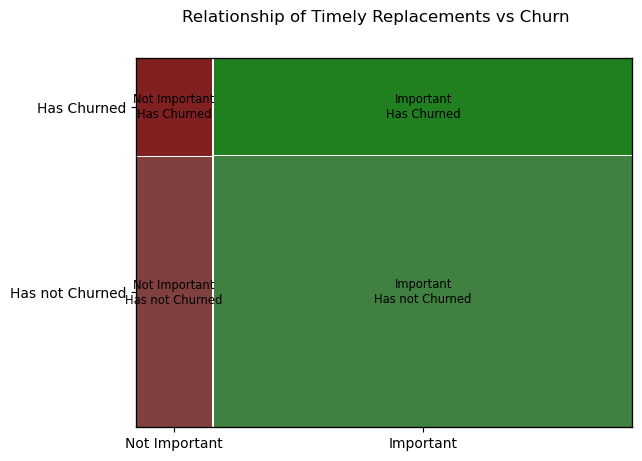

In [39]:
# First plot: Univariate exploration of Timely Replacements Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Timely Replacements Variable")
Timely_Replacements_counts = model_df["Timely_Replacements"].value_counts().sort_index()
plt.pie(Timely_Replacements_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Timely Replacements Vs Churn
plt.figure(figsize = [14,4])
TRC_df = df[["Timely_Replacements", "Churn"]].copy()
Timely_Replacements_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
TRC_df["Timely_Replacements"] = TRC_df["Timely_Replacements"].map(Timely_Replacements_map)
TRC_df["Churn"] = TRC_df["Churn"].map(Churn_map)
mosaic(TRC_df, ["Timely_Replacements", "Churn"])
plt.suptitle("Relationship of Timely Replacements vs Churn");

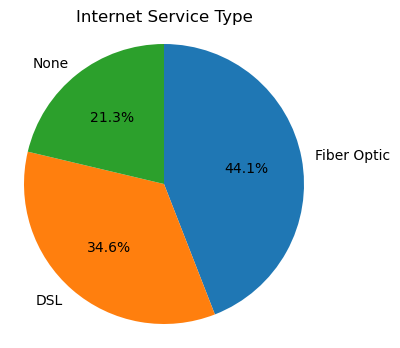

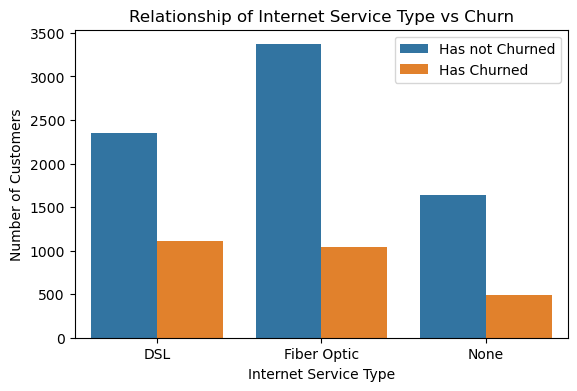

In [40]:
# First plot: Univariate exploration of Internet Service
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Internet Service Type")
Internet_Service_counts = df["Internet_Service"].value_counts()
plt.pie(Internet_Service_counts, labels=Internet_Service_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Internet Service vs Churn
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 2)
plt.title("Relationship of Internet Service Type vs Churn")
sns.countplot(data = df, x="Internet_Service", hue="Churn")
plt.legend(["Has not Churned", "Has Churned"])
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers");

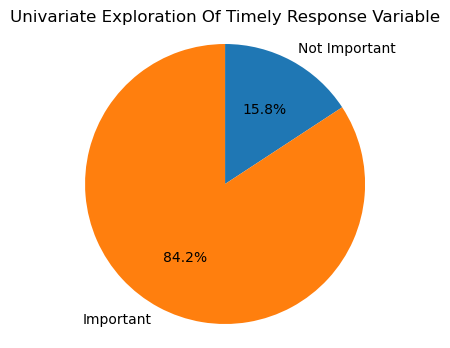

<Figure size 1400x400 with 0 Axes>

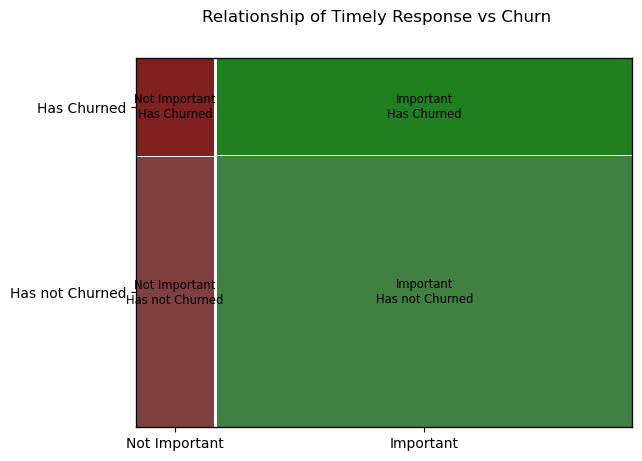

In [41]:
# First plot: Univariate exploration of Timely Response Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Timely Response Variable")
Timely_Response_counts = model_df["Timely_Response"].value_counts().sort_index()
plt.pie(Timely_Response_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Timely Response vs Churn
plt.figure(figsize = [14,4])
TRRC_df = df[["Timely_Response", "Churn"]].copy()
Timely_Response_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
TRRC_df["Timely_Response"] = TRRC_df["Timely_Response"].map(Timely_Response_map)
TRRC_df["Churn"] = TRRC_df["Churn"].map(Churn_map)
mosaic(TRRC_df, ["Timely_Response", "Churn"])
plt.suptitle("Relationship of Timely Response vs Churn");

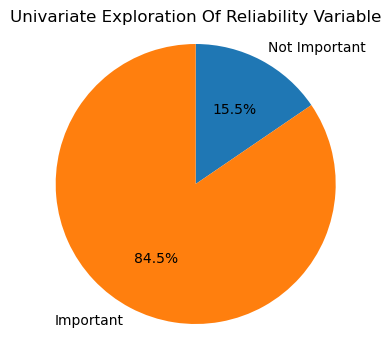

<Figure size 1400x400 with 0 Axes>

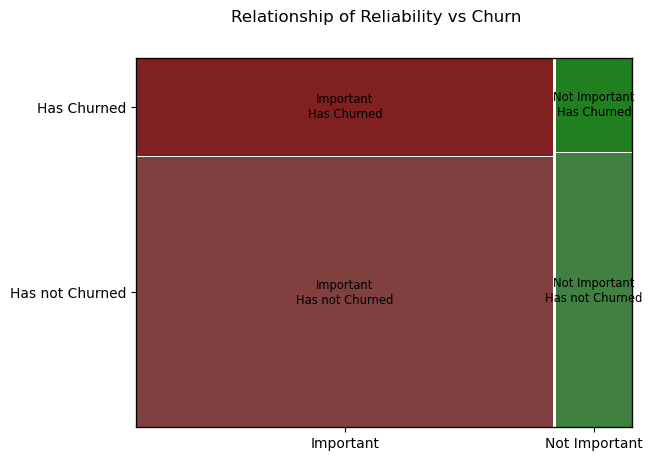

In [42]:
# First plot: Univariate exploration of Reliability Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Reliability Variable")
Reliability_counts = model_df["Reliability"].value_counts().sort_index()
plt.pie(Reliability_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Reliability vs Churn
plt.figure(figsize = [14,4])
RC_df = df[["Reliability", "Churn"]].copy()
Reliability_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
RC_df["Reliability"] = RC_df["Reliability"].map(Reliability_map)
RC_df["Churn"] = RC_df["Churn"].map(Churn_map)
mosaic(RC_df, ["Reliability", "Churn"])
plt.suptitle("Relationship of Reliability vs Churn");

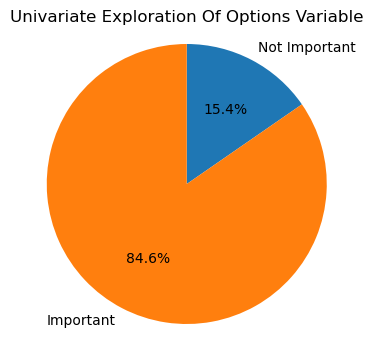

<Figure size 1400x400 with 0 Axes>

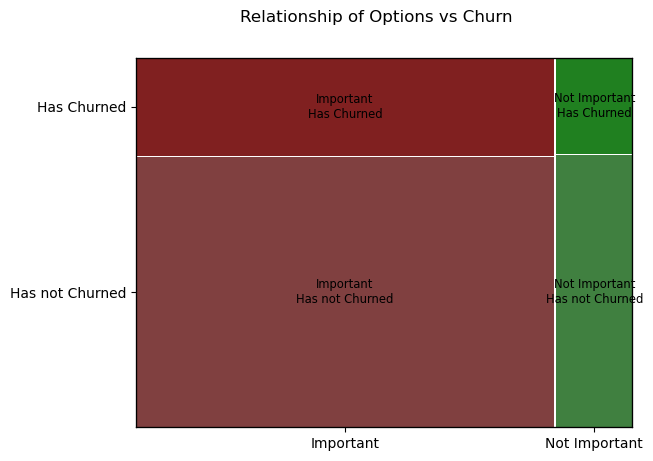

In [43]:
# First plot: Univariate exploration of Options Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Options Variable")
Options_counts = model_df["Options"].value_counts().sort_index()
plt.pie(Options_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Options vs Churn
plt.figure(figsize = [14,4])
OC_df = df[["Options", "Churn"]].copy()
Options_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
OC_df["Options"] = OC_df["Options"].map(Options_map)
OC_df["Churn"] = OC_df["Churn"].map(Churn_map)
mosaic(OC_df, ["Options", "Churn"])
plt.suptitle("Relationship of Options vs Churn");

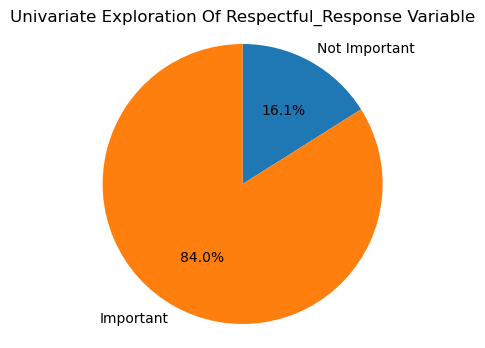

<Figure size 1400x400 with 0 Axes>

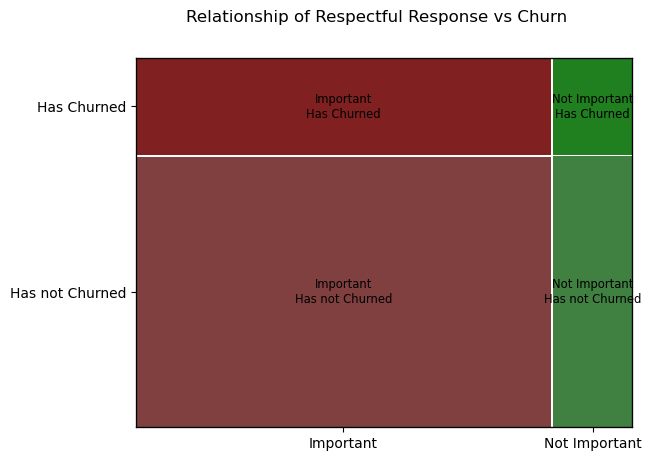

In [44]:
# First plot: Univariate exploration of Respectful_Response Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Respectful_Response Variable")
Respectful_Response_counts = model_df["Respectful_Response"].value_counts().sort_index()
plt.pie(Respectful_Response_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Respectful Response vs Churn
plt.figure(figsize = [14,4])
RR_df = df[["Respectful_Response", "Churn"]].copy()
Respectful_Response_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
RR_df["Respectful_Response"] = RR_df["Respectful_Response"].map(Respectful_Response_map)
RR_df["Churn"] = RR_df["Churn"].map(Churn_map)
mosaic(RR_df, ["Respectful_Response", "Churn"])
plt.suptitle("Relationship of Respectful Response vs Churn");

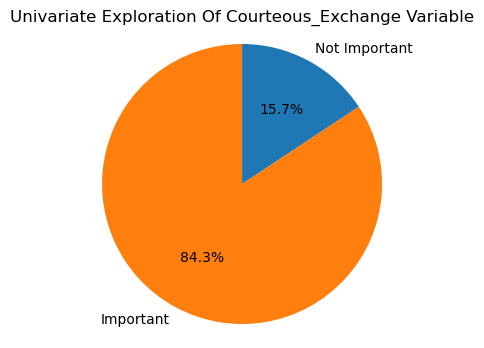

<Figure size 1400x400 with 0 Axes>

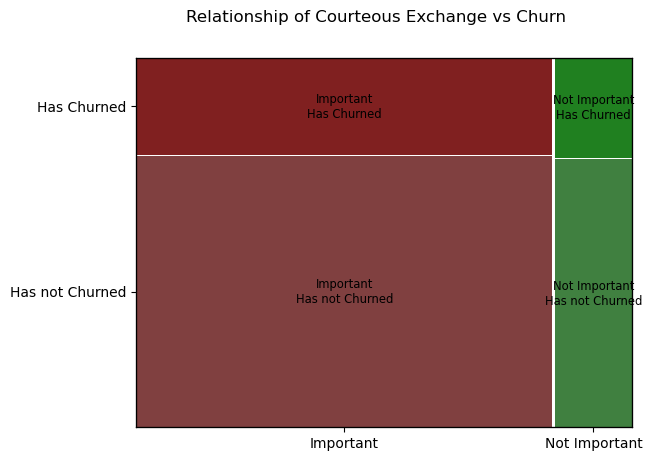

In [45]:
# First plot: Univariate exploration of Courteous_Exchange Variable
plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Courteous_Exchange Variable")
Courteous_Exchange_counts = model_df["Courteous_Exchange"].value_counts().sort_index()
plt.pie(Courteous_Exchange_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Courteous Exchange vs Churn
plt.figure(figsize = [14,4])
CEC_df = df[["Courteous_Exchange", "Churn"]].copy()
Courteous_Exchange_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
CEC_df["Courteous_Exchange"] = CEC_df["Courteous_Exchange"].map(Courteous_Exchange_map)
CEC_df["Churn"] = CEC_df["Churn"].map(Churn_map)
mosaic(CEC_df, ["Courteous_Exchange", "Churn"])
plt.suptitle("Relationship of Courteous Exchange vs Churn");

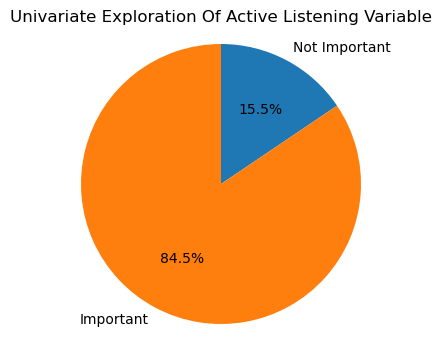

<Figure size 1400x400 with 0 Axes>

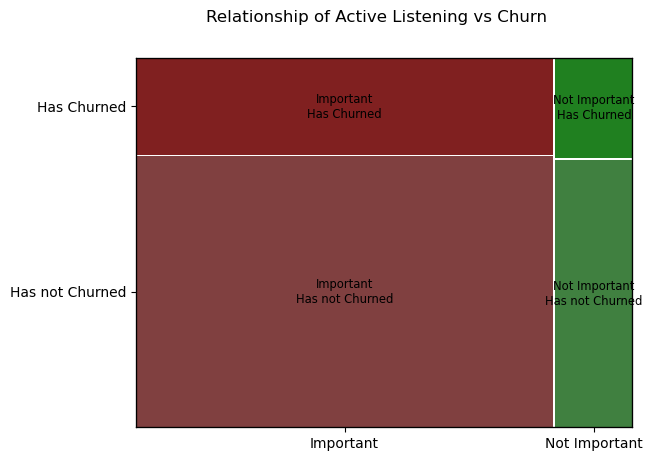

In [46]:
# First plot: Univariate exploration of Active_Listening Variable

plt.figure(figsize = [14,4])
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration Of Active Listening Variable")
Active_Listening_counts = model_df["Active_Listening"].value_counts().sort_index()
plt.pie(Active_Listening_counts, labels=["Not Important", "Important"], autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# Second plot: Bivariate exploration of Active Listening vs Churn
plt.figure(figsize = [14,4])
AL_df = df[["Active_Listening", "Churn"]].copy()
Active_Listening_map = {1 : "Important", 0: "Not Important"}
Churn_map = {1 : "Has Churned", 0: "Has not Churned"}
AL_df["Active_Listening"] = AL_df["Active_Listening"].map(Active_Listening_map)
AL_df["Churn"] = AL_df["Churn"].map(Churn_map)
mosaic(AL_df, ["Active_Listening", "Churn"])
plt.suptitle("Relationship of Active Listening vs Churn");

In [47]:
# View data types and column information, dataframe as a whole
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Bandwidth_Usage               10000 non-null  int64
 1   Outages                       10000 non-null  int64
 2   Equipment_failure             10000 non-null  int64
 3   Monthly_Charge                10000 non-null  int64
 4   Income                        10000 non-null  int64
 5   Multiple                      10000 non-null  int64
 6   Online_Security               10000 non-null  int64
 7   Online_Backup                 10000 non-null  int64
 8   Churn                         10000 non-null  int64
 9   Timely_Response               10000 non-null  int64
 10  Timely_Fixes                  10000 non-null  int64
 11  Timely_Replacements           10000 non-null  int64
 12  Reliability                   10000 non-null  int64
 13  Options                       1

In [48]:
# Create initial regressions results
y = model_df.Churn
X = model_df[["Income" , "Monthly_Charge" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Outages" , "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
"Internet_Service_None" , "Internet_Service_Fiber Optic" , "Timely_Response" , 
"Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
"Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]].assign(const=1)
l_model=sm.Logit(y,X)
result=l_model.fit()
print(result.summary())

#add constant to predictor variables
x = sm.add_constant(X)

#fit regression model
red_model = sm.OLS(y, X).fit()

#view AIC of model
print(red_model.aic)

Optimization terminated successfully.
         Current function value: 0.232564
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.5978
Time:                        22:15:37   Log-Likelihood:                -2325.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                        3.011e-07   1.31e-06      0.229      0.819

In [49]:
# Check for high multicollinearity (VIF > 5) among variables
X = model_df[["Income" , "Monthly_Charge" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Outages" , "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Timely_Response" , 
        "Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
        "Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable        VIF
0                         Income   2.895511
1                 Monthly_Charge  19.186020
2                Bandwidth_Usage   3.365857
3                       Multiple   2.224782
4                Online_Security   1.556622
5                  Online_Backup   1.995495
6                        Outages   9.567035
7              Equipment_failure   1.387620
8              Contract_One year   1.378658
9              Contract_Two Year   1.438461
10         Internet_Service_None   1.584750
11  Internet_Service_Fiber Optic   2.423338
12               Timely_Response   8.867568
13                  Timely_Fixes   8.125815
14           Timely_Replacements   7.904159
15                   Reliability   6.161140
16                       Options   5.786415
17           Respectful_Response   7.017446
18            Courteous_Exchange   6.801167
19              Active_Listening   6.616474


In [50]:
# Remove Variable "Monthly_Charge" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Outages" , "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Timely_Response" , 
        "Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
        "Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.863991
1                Bandwidth_Usage  3.266075
2                       Multiple  1.833019
3                Online_Security  1.543876
4                  Online_Backup  1.799638
5                        Outages  9.033140
6              Equipment_failure  1.386276
7              Contract_One year  1.373897
8              Contract_Two Year  1.435405
9          Internet_Service_None  1.583216
10  Internet_Service_Fiber Optic  2.199079
11               Timely_Response  8.857365
12                  Timely_Fixes  8.105404
13           Timely_Replacements  7.855134
14                   Reliability  6.003845
15                       Options  5.501106
16           Respectful_Response  6.989842
17            Courteous_Exchange  6.733788
18              Active_Listening  6.550022


In [51]:
# Remove Variable "Outages" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Timely_Response" , 
        "Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
        "Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.839638
1                Bandwidth_Usage  3.216464
2                       Multiple  1.824240
3                Online_Security  1.540497
4                  Online_Backup  1.793782
5              Equipment_failure  1.384216
6              Contract_One year  1.370713
7              Contract_Two Year  1.429236
8          Internet_Service_None  1.568680
9   Internet_Service_Fiber Optic  2.172701
10               Timely_Response  8.846529
11                  Timely_Fixes  8.072952
12           Timely_Replacements  7.803313
13                   Reliability  5.847306
14                       Options  5.150194
15           Respectful_Response  6.937704
16            Courteous_Exchange  6.648857
17              Active_Listening  6.489027


In [52]:
# Remove Variable "Timely_Response" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
        "Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
        "Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.839485
1                Bandwidth_Usage  3.212220
2                       Multiple  1.824219
3                Online_Security  1.540020
4                  Online_Backup  1.793665
5              Equipment_failure  1.384091
6              Contract_One year  1.370434
7              Contract_Two Year  1.429070
8          Internet_Service_None  1.566800
9   Internet_Service_Fiber Optic  2.172690
10                  Timely_Fixes  7.094515
11           Timely_Replacements  7.239841
12                   Reliability  5.846096
13                       Options  5.116974
14           Respectful_Response  6.808913
15            Courteous_Exchange  6.561810
16              Active_Listening  6.440214


In [53]:
# Remove Variable "Timely_Replacements" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
        "Timely_Fixes" , "Reliability" , 
        "Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.830748
1                Bandwidth_Usage  3.202154
2                       Multiple  1.823448
3                Online_Security  1.539603
4                  Online_Backup  1.790741
5              Equipment_failure  1.382094
6              Contract_One year  1.370060
7              Contract_Two Year  1.427612
8          Internet_Service_None  1.566029
9   Internet_Service_Fiber Optic  2.166915
10                  Timely_Fixes  6.336905
11                   Reliability  5.832094
12                       Options  5.025520
13           Respectful_Response  6.646223
14            Courteous_Exchange  6.480772
15              Active_Listening  6.342818


In [54]:
# Remove Variable "Respectful_Response" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
        "Timely_Fixes" , "Reliability" , 
        "Options" , "Courteous_Exchange" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.821743
1                Bandwidth_Usage  3.188792
2                       Multiple  1.822211
3                Online_Security  1.538041
4                  Online_Backup  1.789205
5              Equipment_failure  1.381489
6              Contract_One year  1.369877
7              Contract_Two Year  1.426394
8          Internet_Service_None  1.560774
9   Internet_Service_Fiber Optic  2.163231
10                  Timely_Fixes  6.024222
11                   Reliability  5.625622
12                       Options  5.018493
13            Courteous_Exchange  6.137363
14              Active_Listening  6.131239


In [55]:
# Remove Variable "Courteous_Exchange" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
        "Timely_Fixes" , "Reliability" , 
        "Options" , "Active_Listening"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.810056
1                Bandwidth_Usage  3.163428
2                       Multiple  1.820025
3                Online_Security  1.533732
4                  Online_Backup  1.786595
5              Equipment_failure  1.379885
6              Contract_One year  1.368670
7              Contract_Two Year  1.424830
8          Internet_Service_None  1.555777
9   Internet_Service_Fiber Optic  2.152233
10                  Timely_Fixes  5.603701
11                   Reliability  5.366301
12                       Options  4.990573
13              Active_Listening  5.812230


In [56]:
# Remove Variable "Active_Listening" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
        "Timely_Fixes" , "Reliability" , 
        "Options"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.787425
1                Bandwidth_Usage  3.116284
2                       Multiple  1.814172
3                Online_Security  1.530891
4                  Online_Backup  1.779628
5              Equipment_failure  1.378053
6              Contract_One year  1.364231
7              Contract_Two Year  1.419761
8          Internet_Service_None  1.538276
9   Internet_Service_Fiber Optic  2.129476
10                  Timely_Fixes  5.111696
11                   Reliability  4.995837
12                       Options  4.914814


In [57]:
# Remove Variable "Timely_Fixes" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
         "Reliability" , 
        "Options"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.746179
1                Bandwidth_Usage  3.057655
2                       Multiple  1.800600
3                Online_Security  1.526195
4                  Online_Backup  1.772383
5              Equipment_failure  1.372860
6              Contract_One year  1.356560
7              Contract_Two Year  1.413212
8          Internet_Service_None  1.518118
9   Internet_Service_Fiber Optic  2.091885
10                   Reliability  4.625861
11                       Options  4.535348


In [58]:
# Begin backward elimination by checking regression results for P-values > 0.05
y = model_df.Churn
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" ,  
         "Reliability" , "Options"]].assign(const=1)
l_model01=sm.Logit(y,X)
result=l_model01.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392833
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3206
Time:                        22:15:49   Log-Likelihood:                -3928.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                        3.961e-07      1e-06      0.396      0.692

In [59]:
# Continue backward elimination after removing "Reliability" for p-value: 0.847
y = model_df.Churn
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Options"]].assign(const=1)
l_model02=sm.Logit(y,X)
result=l_model02.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3206
Time:                        22:15:50   Log-Likelihood:                -3928.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                        3.985e-07      1e-06      0.399      0.690

In [60]:
# Continue backward elimination after removing "Online_Security" for p-value: 0.813 
y = model_df.Churn
X = model_df[["Income" , "Bandwidth_Usage" , "Multiple" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Options"]].assign(const=1)
l_model03=sm.Logit(y,X)
result=l_model03.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392838
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3206
Time:                        22:15:51   Log-Likelihood:                -3928.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                        4.033e-07      1e-06      0.403      0.687

In [61]:
# Continue backward elimination after removing "Income" for p-value: 0.687 
y = model_df.Churn
X = model_df[["Bandwidth_Usage" , "Multiple" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic" , "Options"]].assign(const=1)
l_model04=sm.Logit(y,X)
result=l_model04.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392846
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3206
Time:                        22:15:52   Log-Likelihood:                -3928.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Bandwidth_Usage                 -0.0007   1.71e-05    -41.155      0.000

In [62]:
# Continue backward elimination after removing "Options" for p-value: 0.414
y = model_df.Churn
X = model_df[["Bandwidth_Usage" , "Multiple" , "Online_Backup" ,
              "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic"]].assign(const=1)
l_model05=sm.Logit(y,X)
result=l_model05.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392879
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3205
Time:                        22:15:53   Log-Likelihood:                -3928.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Bandwidth_Usage                 -0.0007   1.71e-05    -41.151      0.000

In [63]:
# Continue backward elimination after removing "Equipment_failure" for p-value: 0.396
y = model_df.Churn
X = model_df[["Bandwidth_Usage" , "Multiple" , "Online_Backup" ,
              "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic"]].assign(const=1)
l_model06=sm.Logit(y,X)
result=l_model06.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3205
Time:                        22:15:54   Log-Likelihood:                -3929.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Bandwidth_Usage                 -0.0007   1.71e-05    -41.161      0.000

In [65]:
# Create the Reduced model
y = model_df.Churn
X = model_df[["Bandwidth_Usage" , "Multiple" , "Online_Backup" ,
              "Contract_One year" , "Contract_Two Year" , 
        "Internet_Service_None" , "Internet_Service_Fiber Optic"]].assign(const=1)
red_model=sm.Logit(y,X)
red_result=red_model.fit()
print(red_result.summary())


#add constant to predictor variables
x = sm.add_constant(X)

#fit regression model
red_model = sm.OLS(y, X).fit()

#view AIC of model
print(red_model.aic)

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.3205
Time:                        22:16:00   Log-Likelihood:                -3929.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Bandwidth_Usage                 -0.0007   1.71e-05    -41.161      0.000

In [66]:
# Create the confusion matrix for reduced model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
C_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_test, y_test)))
print("Confusion Matrix:")
print(C_matrix)

# Find accuracy, recision, recall and F1 score for reduced model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score :", F1_score)

Accuracy of logistic regression: 0.81
Confusion Matrix:
[[1301  155]
 [ 222  322]]
Accuracy : 0.8115
Precision : 0.6750524109014675
Recall : 0.5919117647058824
F1-score : 0.6307541625857004


In [67]:
# Re-create initial regressions results 
y = model_df.Churn
X = model_df[["Income" , "Monthly_Charge" , "Bandwidth_Usage" , "Multiple" , "Online_Security" , "Online_Backup" ,
              "Outages" , "Equipment_failure" , "Contract_One year" , "Contract_Two Year" , 
"Internet_Service_None" , "Internet_Service_Fiber Optic" , "Timely_Response" , 
"Timely_Fixes" , "Timely_Replacements" ,  "Reliability" , 
"Options" , "Respectful_Response" , "Courteous_Exchange" , "Active_Listening"]].assign(const=1)
l_model=sm.Logit(y,X)
result=l_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.232564
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Sun, 03 Sep 2023   Pseudo R-squ.:                  0.5978
Time:                        22:16:13   Log-Likelihood:                -2325.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income                        3.011e-07   1.31e-06      0.229      0.819

In [68]:
# Create the confusion matrix for initial model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
C_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy of logistic regression: {:.2f}'.format(logreg.score(X_test, y_test)))
print("Confusion Matrix:")
print(C_matrix)

# Find accuracy, recision, recall and F1 score for initial model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score :", F1_score)

Accuracy of logistic regression: 0.87
Confusion Matrix:
[[1360   96]
 [ 166  378]]
Accuracy : 0.869
Precision : 0.7974683544303798
Recall : 0.6948529411764706
F1-score : 0.7426326129666011


In [69]:
# Save final dataframe
model_df.to_csv('norm_df.csv', index=False)